In [1]:
# 1) Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2) Loop through the cities list.
# 3) Group the cities in sets of 50 to log the process as we find the weather data for each city.
            # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4) Build the city_url or endpoint for each city.
# 5) Log the URL and the record and set numbers.
# 6) Make an API request for each city.
# 7) Parse the JSON weather data for the following:
        # City, country, and date
        # Latitude and longitude
        # Maximum temperature
        # Humidity
        # Cloudiness
        # Wind speed
# 8) Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [2]:
# 1) Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint

#Import your Requests Library and the weather_api_key.
import requests
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


# Import the datetime module from the datetime library.
from datetime import datetime

#import json

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# 2) Loop through the cities list.
#When you run the code block, you should get slightly more than 500 unique cities. 
#If you get fewer than 500, increase your size limit on the np.random.uniform() function.

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# 1) Initialize an Empty List and Counters

#Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# 3) Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
        
    # 5) Log the URL and the record and set numbers.
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    # Add 1 to the record count.
    record_count += 1
    
    # 4) Build the city_url or endpoint for each city.
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # 6) Make an API request for each city.
       # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # 7) Parse the JSON weather data for the following:
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | mnogovershinnyy
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | sotouboua
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | chadiza
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | toliary
City not found. Skipping...
Processing Record 13 of Set 1 | jinxiang
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | rungata
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | mazabuka
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | broome
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | pevek
Processing Reco

Processing Record 36 of Set 4 | bakel
Processing Record 37 of Set 4 | kemerovo
Processing Record 38 of Set 4 | cumana
Processing Record 39 of Set 4 | mecca
Processing Record 40 of Set 4 | vanimo
Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | nioro
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | lancaster
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | llanes
Processing Record 48 of Set 4 | namatanai
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | alice town
Processing Record 1 of Set 5 | aksarka
Processing Record 2 of Set 5 | lukaya
Processing Record 3 of Set 5 | coihaique
Processing Record 4 of Set 5 | little current
Processing Record 5 of Set 5 | mporokoso
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | vanino
Processing Record 8 of Set 5 | castro
Processing Record 9 of Set 5 | bengku

Processing Record 24 of Set 8 | mitsamiouli
Processing Record 25 of Set 8 | chara
Processing Record 26 of Set 8 | virarajendrapet
Processing Record 27 of Set 8 | cradock
Processing Record 28 of Set 8 | tutoia
Processing Record 29 of Set 8 | isla mujeres
Processing Record 30 of Set 8 | buchanan
Processing Record 31 of Set 8 | japura
Processing Record 32 of Set 8 | maragogi
Processing Record 33 of Set 8 | khanpur
Processing Record 34 of Set 8 | sartana
Processing Record 35 of Set 8 | kruisfontein
Processing Record 36 of Set 8 | sao joao da barra
Processing Record 37 of Set 8 | tiksi
Processing Record 38 of Set 8 | antofagasta
Processing Record 39 of Set 8 | virden
Processing Record 40 of Set 8 | luchegorsk
Processing Record 41 of Set 8 | hambantota
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | kaeo
Processing Record 44 of Set 8 | huntsville
Processing Record 45 of Set 8 | tchibanga
Processing Record 46 of Set 8 | kodino
Processing Record 47 of Set 8 | shu
Proc

Processing Record 14 of Set 12 | bobbili
Processing Record 15 of Set 12 | stornoway
Processing Record 16 of Set 12 | auki
Processing Record 17 of Set 12 | mwene-ditu
Processing Record 18 of Set 12 | udachnyy
Processing Record 19 of Set 12 | roxana
Processing Record 20 of Set 12 | fougamou
Processing Record 21 of Set 12 | garden city
Processing Record 22 of Set 12 | oranjestad
Processing Record 23 of Set 12 | quatre cocos
Processing Record 24 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 25 of Set 12 | rincon
Processing Record 26 of Set 12 | santiago de cao
Processing Record 27 of Set 12 | pedernales
Processing Record 28 of Set 12 | adre
Processing Record 29 of Set 12 | pemangkat
Processing Record 30 of Set 12 | hami
Processing Record 31 of Set 12 | boende
Processing Record 32 of Set 12 | ndola
Processing Record 33 of Set 12 | siloam springs
Processing Record 34 of Set 12 | artvin
Processing Record 35 of Set 12 | storsteinnes
Processing Record 36 of Set 12 | zonguld

In [8]:
# 8) Add the data to a list in a dictionary format and then convert the list to a DataFrame.
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,43.48,97,96,7.00,NZ,2021-09-29 15:29:09
1,Avarua,-21.2078,-159.7750,66.25,100,100,2.30,CK,2021-09-29 15:29:10
2,Busselton,-33.6500,115.3333,59.09,90,5,7.70,AU,2021-09-29 15:29:10
3,Mnogovershinnyy,53.9353,139.9242,52.03,90,100,4.14,RU,2021-09-29 15:29:10
4,Chuy,-33.6971,-53.4616,61.84,68,97,9.69,UY,2021-09-29 15:29:11
...,...,...,...,...,...,...,...,...,...
540,Karpathos,35.5070,27.2132,73.36,68,20,21.85,GR,2021-09-29 15:32:07
541,Porto Velho,-8.7619,-63.9039,87.85,51,0,3.44,BR,2021-09-29 15:32:07
542,Rocha,-34.4833,-54.3333,64.36,56,0,10.22,UY,2021-09-29 15:32:08
543,Jalu,29.0331,21.5482,87.37,25,0,9.13,LY,2021-09-29 15:32:08


In [9]:
#Reorder columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity", "Cloudiness","Wind Speed"]

#assign city_data_df with new column order
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-09-29 15:29:09,-46.1927,168.8643,43.48,97,96,7.00
1,Avarua,CK,2021-09-29 15:29:10,-21.2078,-159.7750,66.25,100,100,2.30
2,Busselton,AU,2021-09-29 15:29:10,-33.6500,115.3333,59.09,90,5,7.70
3,Mnogovershinnyy,RU,2021-09-29 15:29:10,53.9353,139.9242,52.03,90,100,4.14
4,Chuy,UY,2021-09-29 15:29:11,-33.6971,-53.4616,61.84,68,97,9.69
...,...,...,...,...,...,...,...,...,...
540,Karpathos,GR,2021-09-29 15:32:07,35.5070,27.2132,73.36,68,20,21.85
541,Porto Velho,BR,2021-09-29 15:32:07,-8.7619,-63.9039,87.85,51,0,3.44
542,Rocha,UY,2021-09-29 15:32:08,-34.4833,-54.3333,64.36,56,0,10.22
543,Jalu,LY,2021-09-29 15:32:08,29.0331,21.5482,87.37,25,0,9.13


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

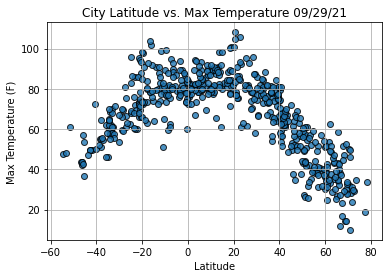

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

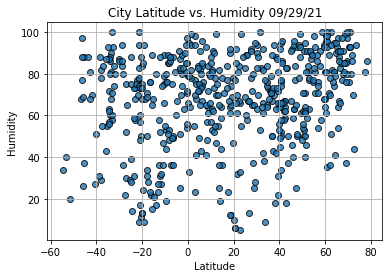

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

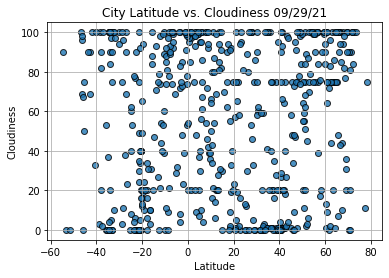

In [14]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

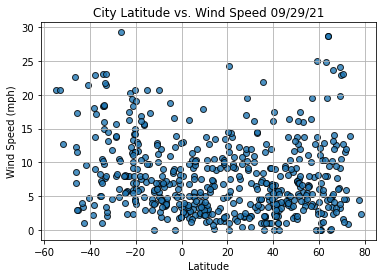

In [15]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
#create new DataFrame from city_data_df
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-09-29 15:26:19
Lat                       42.6001
Lng                      -73.9662
Max Temp                     61.3
Humidity                       59
Cloudiness                     18
Wind Speed                    3.0
Name: 13, dtype: object

In [18]:
#filter DataFrame based onthe vluae of a row. Northern Hemispher latitudes >=0
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
540     True
541    False
542    False
543     True
544     True
Name: Lat, Length: 545, dtype: bool

In [19]:
#return DataFrame with criteral latitudes >=0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Mnogovershinnyy,RU,2021-09-29 15:29:10,53.9353,139.9242,52.03,90,100,4.14
5,Qaanaaq,GL,2021-09-29 15:29:11,77.4840,-69.3632,18.90,81,11,4.43
7,Sotouboua,TG,2021-09-29 15:29:12,8.5667,0.9833,89.64,64,92,4.16
8,Yellowknife,CA,2021-09-29 15:28:00,62.4560,-114.3525,48.42,100,75,2.30
11,Jinxiang,CN,2021-09-29 15:29:13,27.4327,120.6062,78.58,78,53,1.95


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

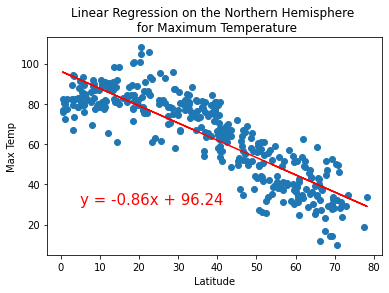

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,30))

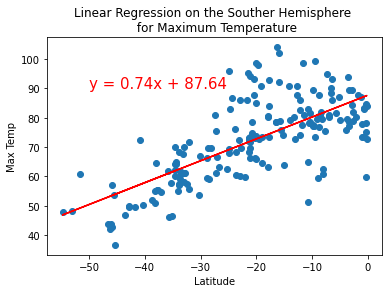

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Souther Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

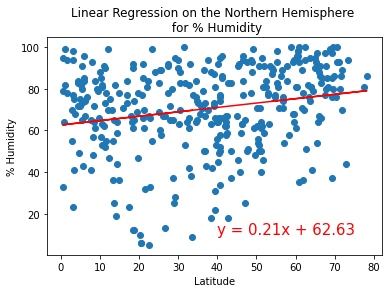

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

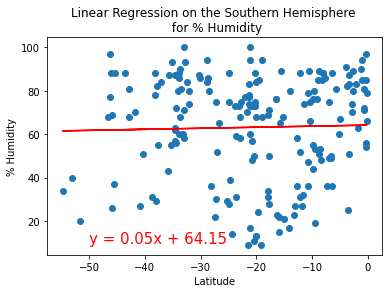

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,10))

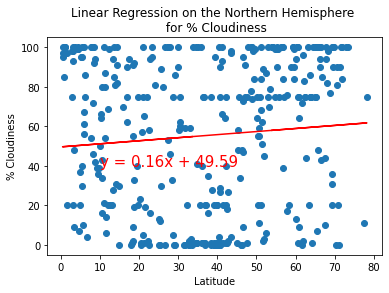

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,40))

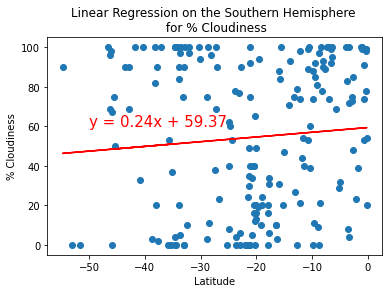

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

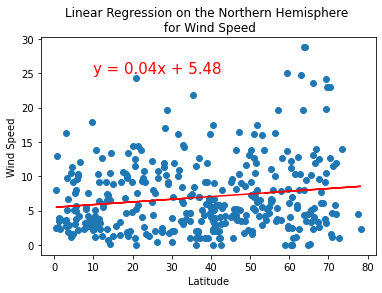

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,25))

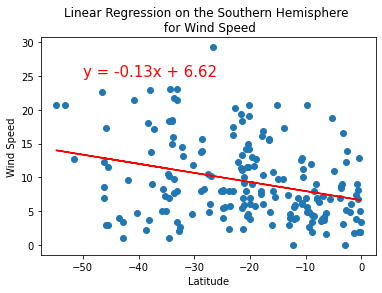

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))